# Feature selection

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
from time import time

In [3]:
from sklearn import datasets

# The iris dataset
iris = datasets.load_iris()

# Some noisy data not correlated
E = np.random.uniform(0, 0.1, size=(len(iris.data), 20))

# Add the noisy data to the informative features
X = np.hstack((iris.data, E))
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [5]:
X_train_indices = np.arange(X_train.shape[-1])

## 1 Filter methods
### 1.1 Pearson’s correlation

Input data shape:  (120, 24)
Output data shape:  (120, 3)
Selected features:  [0, 2, 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

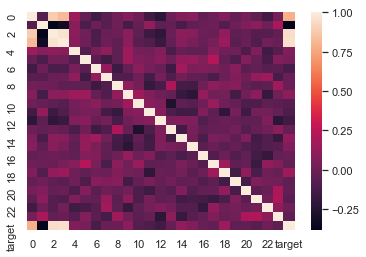

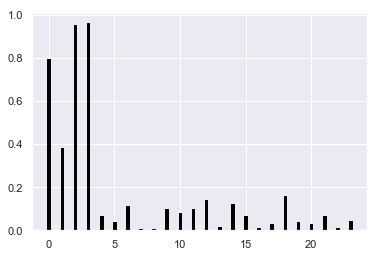

In [5]:
start = time()

df = pd.DataFrame(X_train)
df['target'] = y_train

cor = df.corr()
cor_target = abs(cor['target'][:-1])

print('Input data shape: ', X_train.shape)

relevant_features = cor_target[cor_target>0.5]
X_train_new = df[list(relevant_features.index)].values

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', list(relevant_features.index))
print('Elapsed time: %.2fs' % (time() - start))

plt.figure(0)
sns.heatmap(cor)

plt.figure(1)
plt.bar(X_train_indices, cor_target, width=.2, color='black', edgecolor='black')

In [6]:
df = pd.DataFrame(X_test)
X_test_new = df[list(relevant_features.index)].values
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 3)


### 1.2 LDA

In [7]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

start = time()

lda = LDA(n_components=None)

print('Input data shape: ', X_train.shape)

X_train_new = lda.fit_transform(X_train, y_train)

print('Output data shape: ', X_train_new.shape)
print('Elapsed time: %.2fs' % (time() - start))

Input data shape:  (120, 24)
Output data shape:  (120, 2)
Elapsed time: 0.01s


In [8]:
X_test_new = lda.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


### 1.3 ANOVA

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

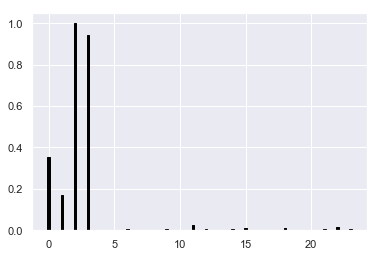

In [9]:
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_classif

start = time()

#selector = SelectPercentile(f_classif, percentile=20)
selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = selector.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = -np.log10(selector.pvalues_)
scores /= scores.max()

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

# Anova needs contignous target so its results are not perfect in this case of iris

In [10]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 1.4 Chi-Square

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_new = scaler.fit_transform(X_train)

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

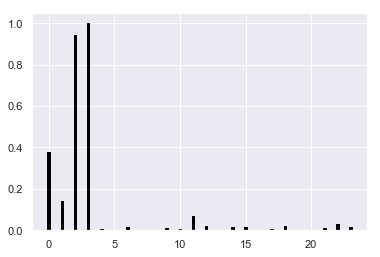

In [12]:
from sklearn.feature_selection import SelectKBest, chi2

start = time()

selector = SelectKBest(chi2, k=4)
selector.fit(X_train_new, y_train)

print('Input data shape: ', X_train_new.shape)

X_train_new = selector.transform(X_train_new)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = -np.log10(selector.pvalues_)
scores /= scores.max()

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [13]:
X_test_new = scaler.transform(X_test)
X_test_new = selector.transform(X_test_new)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 1.5 Variance threshold

In [14]:
from sklearn.feature_selection import VarianceThreshold

start = time()

selector = VarianceThreshold(threshold=(.8 * (1 - .8)))

print('Input data shape: ', X_train.shape)

X_train_new = selector.fit_transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Deleted features: ', set(X_train_indices) - set(selector.get_support(indices=True)))
print('Elapsed time: %.2fs' % (time() - start))

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Deleted features:  {4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
Elapsed time: 0.00s


In [15]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 1.6 Information gain (mutual information)

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.04s


<BarContainer object of 24 artists>

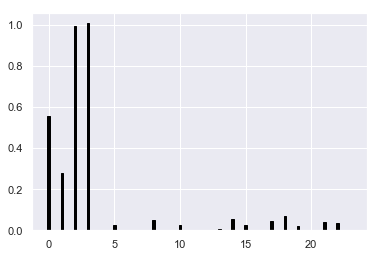

In [16]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

start = time()

selector = SelectKBest(mutual_info_classif, k=4)
selector.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = selector.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', selector.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = selector.scores_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [17]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


## 2 Wrapper methods

In [8]:
from sklearn.ensemble import RandomForestClassifier

C:\Users\Piotr\Anaconda3\envs\kaggle\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


### 2.1 Recursive feature elimination (RFE)

In [19]:
# A:
from sklearn.feature_selection import RFE

start = time()

rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1, class_weight='balanced')
rfe = RFE(estimator=rfc, n_features_to_select=81, step=1)
rfe.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = rfe.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', rfe.get_support(indices=True))
print('Features ranking: ', rfe.ranking_)
print('Elapsed time: %.2fs' % (time() - start))

Input data shape:  (120, 24)
Output data shape:  (120, 24)
Selected features:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Features ranking:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Elapsed time: 0.12s


In [20]:
X_test_new = rfe.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 24)


Input data shape:  (120, 24)
Output data shape:  (120, 2)
Optimal number of features : 2
Selected features:  [2 3]
Features ranking:  [ 2  3  1  1 11 14 17 22 12 20 16 15  8  7 18  9 21 13 19 10  5  6  4 23]
Elapsed time: 83.36s


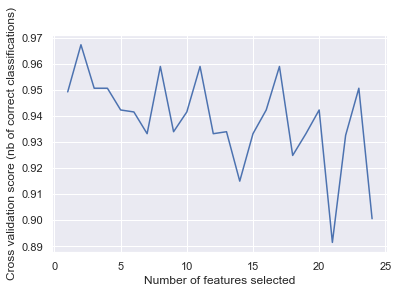

In [21]:
# B: Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.

from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

start = time()

rfc = RandomForestClassifier(n_estimators=10, n_jobs=-1, class_weight='balanced')
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = rfecv.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % rfecv.n_features_)
print('Selected features: ', rfecv.get_support(indices=True))
print('Features ranking: ', rfecv.ranking_)
print('Elapsed time: %.2fs' % (time() - start))

plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [22]:
X_test_new = rfecv.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


### 2.2 Boruta

In [9]:
from boruta import BorutaPy

start = time()

rfc = RandomForestClassifier(n_estimators=1, n_jobs=-1, class_weight='balanced')
selector = BorutaPy(rfc, n_estimators=1)
selector.fit(X_train, y_train)

print('Input data shape: ', X_train.shape)

X_train_new = selector.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % selector.n_features_)
print('Selected features: ', [i for i, s in enumerate(selector.support_) if s == True])
print('Features ranking: ', selector.ranking_)
print('Elapsed time: %.2fs' % (time() - start))

Input data shape:  (120, 24)
Output data shape:  (120, 2)
Optimal number of features : 2
Selected features:  [2, 3]
Features ranking:  [ 2  4  1  1 14 14 14 14  6 21 14  7 21  8 10 21  3  5 14 14  8 21 14 21]
Elapsed time: 21.55s


In [24]:
X_test_new = selector.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


## 3 Embedded methods
### 3.1 Lasso regression

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

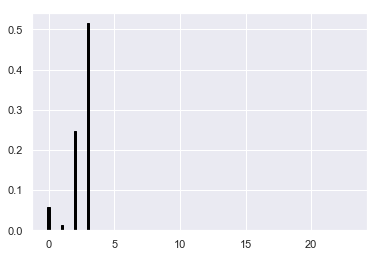

In [25]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = Lasso(alpha=0.01)
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [26]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 3.2 Ridge regression

Input data shape:  (120, 24)
Output data shape:  (120, 5)
Selected features:  [ 0  2  3 12 17]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

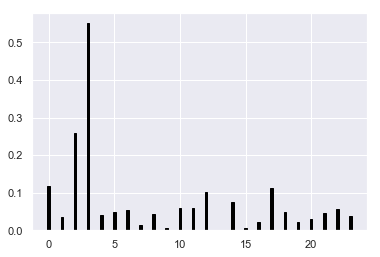

In [27]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = Ridge(alpha=1)
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [28]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 5)


### 3.3 Logistic regression

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [0 1 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

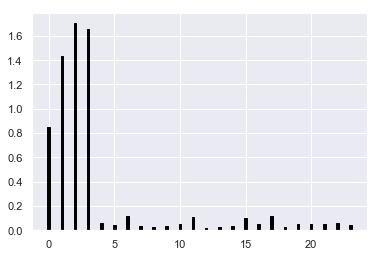

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = LogisticRegression()
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)
scores = [(scores[0][i] + scores[1][i] + scores[2][i])/3 for i in range(len(scores[0]))]

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [30]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 3.4 Elastic Net

Input data shape:  (120, 24)
Output data shape:  (120, 3)
Selected features:  [0 2 3]
Elapsed time: 0.00s


<BarContainer object of 24 artists>

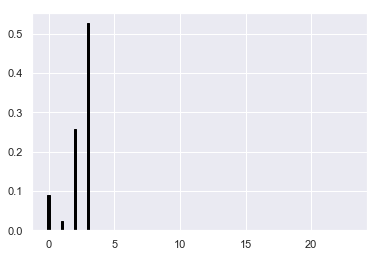

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = ElasticNet(alpha=0.01)
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = abs(rfc.coef_)

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [32]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 3)


### 3.5 Random Forest

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Optimal number of features : 24
Selected features:  [0 1 2 3]
Elapsed time: 0.01s


<BarContainer object of 24 artists>

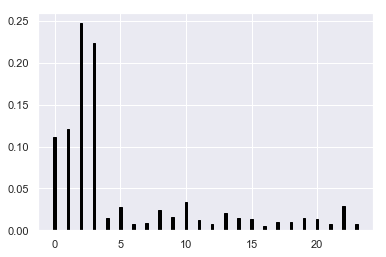

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % rfc.n_features_)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [34]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 3.6 LightGBM

Input data shape:  (120, 24)
Output data shape:  (120, 2)
Optimal number of features : 24
Selected features:  [2 3]
Elapsed time: 0.04s


<BarContainer object of 24 artists>

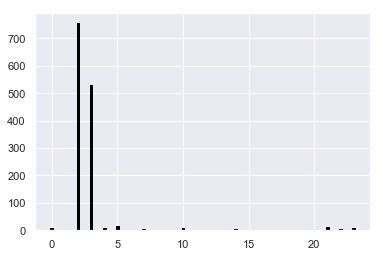

In [35]:
from lightgbm import LGBMModel
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = LGBMModel(boosting_type='gbdt', objective='multiclass', num_class=3, importance_type='gain')
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print("Optimal number of features : %d" % rfc.n_features_)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [36]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


### 3.7 XGBoost

Input data shape:  (120, 24)
Output data shape:  (120, 4)
Selected features:  [2 3 4 8]
Elapsed time: 0.35s


<BarContainer object of 24 artists>

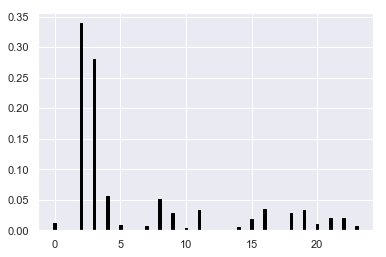

In [37]:
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = XGBClassifier()
rfc.fit(X_train, y_train)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [38]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 4)


### 3.8 CatBoost

Input data shape:  (120, 24)
Output data shape:  (120, 2)
Selected features:  [2 3]
Elapsed time: 31.64s


<BarContainer object of 24 artists>

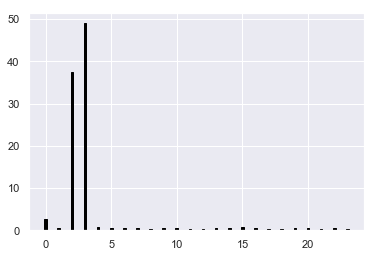

In [6]:
from catboost import CatBoostClassifier
from sklearn.feature_selection import SelectFromModel

start = time()

rfc = CatBoostClassifier()
rfc.fit(X_train, y_train, silent=True)
sfm = SelectFromModel(rfc, prefit=True)

print('Input data shape: ', X_train.shape)

X_train_new = sfm.transform(X_train)

print('Output data shape: ', X_train_new.shape)
print('Selected features: ', sfm.get_support(indices=True))
print('Elapsed time: %.2fs' % (time() - start))

scores = rfc.feature_importances_

plt.bar(X_train_indices, scores, width=.2, color='black', edgecolor='black')

In [40]:
X_test_new = sfm.transform(X_test)
print('Output data shape: ', X_test_new.shape)

Output data shape:  (30, 2)


## Testing

In [41]:
# Use it if you selected features using small subset of data and want to train using 80% of dataset

X_train2 = np.concatenate((X_train, X_test[:14000]))
X_test2 = X_test[14000:18000]

y_train2 = np.concatenate((y_train, y_test[:14000]))
y_test2 = y_test[14000:18000]

X_train_new2 = np.concatenate((X_train_new, X_test_new[:14000]))
X_test_new2 = X_test_new[14000:18000]

### Original dataset:

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

In [46]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
# pred = rfc.predict_proba(X_test)[:,1]

print("Accuracy score:" + str(accuracy_score(y_test, pred)))
# print("AUC score:" + str(roc_auc_score(y_test, pred)))

Accuracy score:0.9


### Modified dataset:

In [45]:
rfc = RandomForestClassifier(n_estimators=1000, random_state=0, n_jobs=-1)

rfc.fit(X_train_new, y_train)
pred = rfc.predict(X_test_new)

print("Accuracy score:" + str(accuracy_score(y_test, pred)))

Accuracy score:0.9666666666666667


In [ ]:
# Santander train: 0.8, test: 0.2

# Original(200): 0.8489

# Pearson's correlation(81): 0.8419
# LDA(1): 0.7716
# Anova(81): 0.8419
# Chi-Square(81): 0.8413
# Variance threshold(186): 0.8376
# Information gain(81): 0.8266

# RFE(81): 0.8361 (1) 0.8396 (10)
# RFECV(46): 0.8153 (1)
# Boruta(29): 0.7891 (1)





In [ ]:
# Santander train: 0.1, test: 0.9

# Original(200): 0.8297

# RFECV(181): 0.83 (10)

In [ ]:
# Santander train: 0.1, test: 0.9 -> train: 0.8, test: 0.2
# Features selected using 10% of dataset, model trained on 80% of dataset

# Original(200): 0.8474

# RFECV(181): 0.8511 (10)

## References:


In [ ]:
# https://scikit-learn.org/stable/modules/feature_selection.html
# https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection